In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initial_probability_vector(d):
    return [0.5]*d

In [3]:
def binary_random(p):
    sample=np.random.rand()
    if sample < p:
        return 1
    return 0

In [4]:
def random_individual(p_vec):
    res=[]
    for k in range(len(p_vec)):
        res.append(binary_random(p_vec[k]))
    return res

In [5]:
def random_population(p_vec, N):
    res=[]
    for k in range(N):
        res.append(random_individual(p_vec))
    return res

In [6]:
def find_best(population, evaluation_result):
    return population[np.argmax(evaluation_result)]

In [7]:
def PBIL(iters, d, F, N, theta1, theta2, theta3):
    p_vec=initial_probability_vector(d)
    population=random_population(p_vec, N)
    evaluation_result=F(population)
    best_evaluation_results=[]
    mean_evaluation_results=[]
    worst_evaluation_results=[]
    solutions=[]
    for i in range(iters):
        best_individual=find_best(population, evaluation_result)
        best_evaluation_results.append(np.max(evaluation_result))
        mean_evaluation_results.append(np.mean(evaluation_result))
        worst_evaluation_results.append(np.min(evaluation_result))
        solutions.append(best_individual)
        for k in range(d):
            p_vec[k] = p_vec[k] * (1 - theta1) + best_individual[k] * theta1
        for k in range(d):
            sample=np.random.rand()
            if sample < theta2:
                p_vec[k] = p_vec[k] * (1 - theta3) + binary_random(0.5) * theta3
        population=random_population(p_vec, N)
        evaluation_result=F(population)
    return find_best(solutions, F(solutions)), best_evaluation_results, mean_evaluation_results, worst_evaluation_results

In [8]:
def one_max(population):
    return np.sum(population, 1)

In [9]:
def plot_chart(P):
    plt.figure(figsize=(20, 7))
    plt.plot(P[1], label="Best results")
    plt.plot(P[2], label="Mean results")
    plt.plot(P[3], label="Worst results")
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.show()

One_max:
For args : 500, 20, one_max, 200, 0.1, 0.5, 0.8


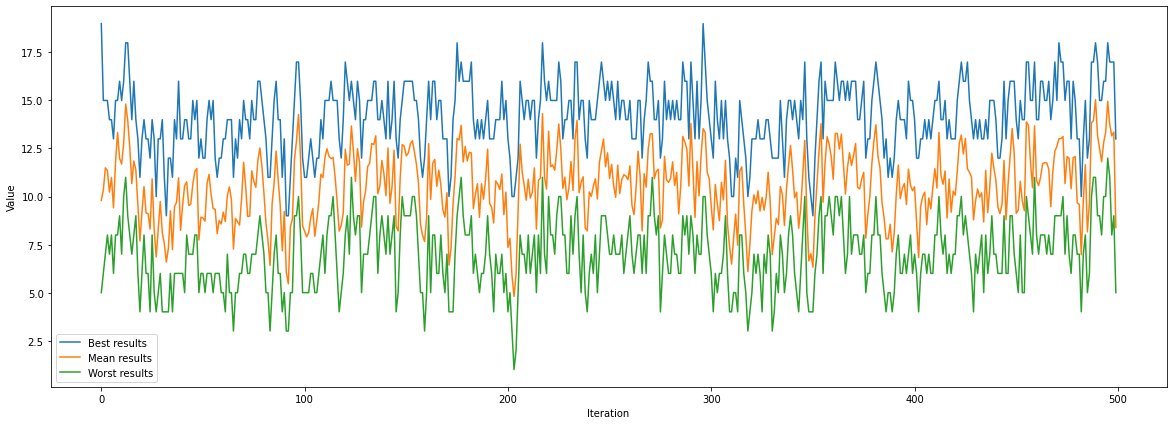

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
For args : 700, 10, one_max, 50, 0.7, 0.3, 0.4


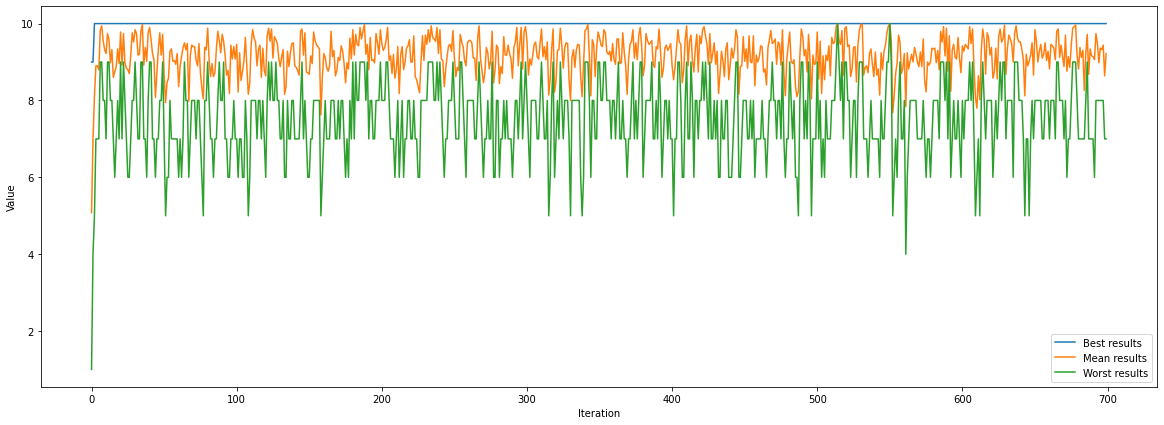

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
For args : 300, 50, one_max, 20, 0.7, 0.1, 0.3


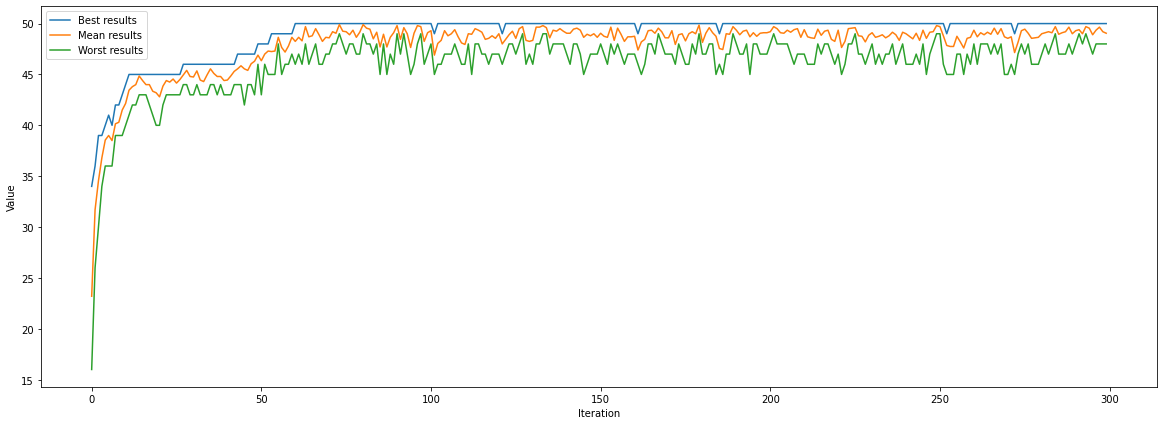

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [10]:
print("One_max:")
print("For args : 500, 20, one_max, 200, 0.1, 0.5, 0.8")
P=PBIL(500, 20, one_max, 200, 0.1, 0.5, 0.8)
plot_chart(P)
print(P[0])
print("For args : 700, 10, one_max, 50, 0.7, 0.3, 0.4")
P=PBIL(700, 10, one_max, 50, 0.7, 0.3, 0.4)
plot_chart(P)
print(P[0])
print("For args : 300, 50, one_max, 20, 0.7, 0.1, 0.3")
P=PBIL(300, 50, one_max, 20, 0.7, 0.1, 0.3)
plot_chart(P)
print(P[0])

In [13]:
def deceptive_one_max(population): 
    res = []
    for i in range(len(population)):
        if population[i] == [0 for i in range(len(population[i]))]:
            res.append(len(population[i]) + 1)
        else:
            res.append(np.sum(population[i]))
    return res

Deceptive_one_max:
For args : 500, 20, deceptive_one_max, 200, 0.1, 0.5, 0.8


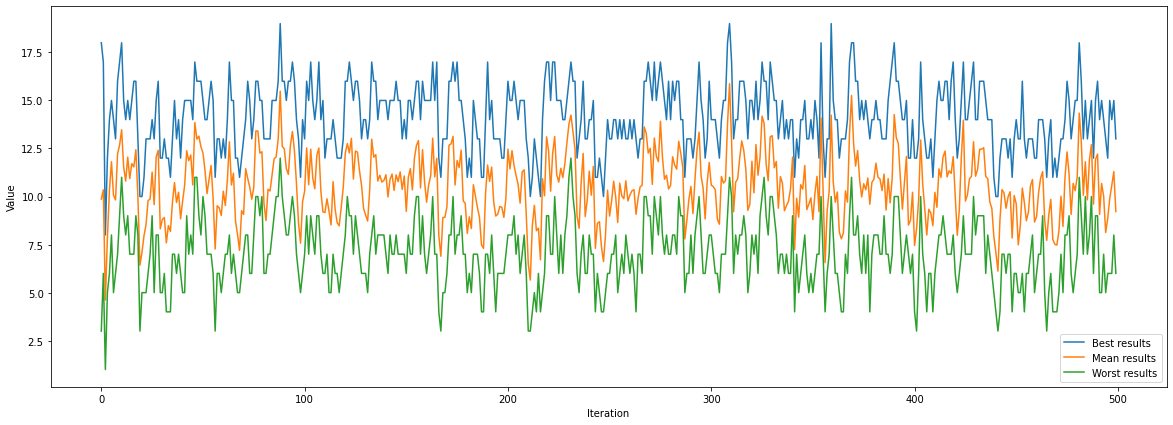

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
For args : 700, 10, deceptive_one_max, 50, 0.7, 0.3, 0.4


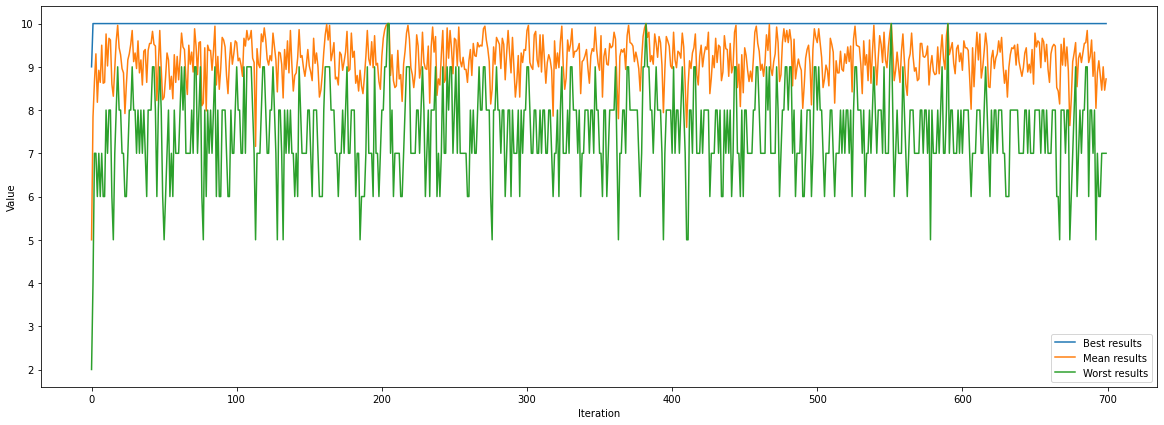

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
For args : 300, 50, deceptive_one_max, 20, 0.7, 0.1, 0.3


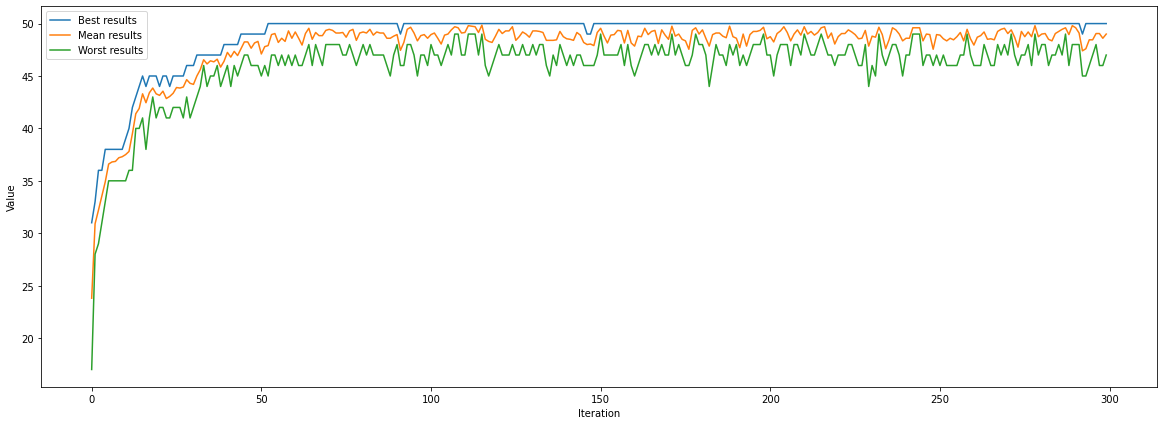

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [14]:
print("Deceptive_one_max:")
print("For args : 500, 20, deceptive_one_max, 200, 0.1, 0.5, 0.8")
P=PBIL(500, 20, deceptive_one_max, 200, 0.1, 0.5, 0.8)
plot_chart(P)
print(P[0])
print("For args : 700, 10, deceptive_one_max, 50, 0.7, 0.3, 0.4")
P=PBIL(700, 10, deceptive_one_max, 50, 0.7, 0.3, 0.4)
plot_chart(P)
print(P[0])
print("For args : 300, 50, deceptive_one_max, 20, 0.7, 0.1, 0.3")
P=PBIL(300, 50, deceptive_one_max, 20, 0.7, 0.1, 0.3)
plot_chart(P)
print(P[0])

In [15]:
k=6
def k_deceptive_one_max(population): 
    res = []
    for i in range(len(population)):
        ith_val=0
        for part in range(0, len(population) // 5):
            if population[i][part * 5 : part * 5 + 5] == [0 for i in range(5)]:
                ith_val += 6
            else:
                ith_val += np.sum(population[i][part * 5 : part * 5 + 5]) 
        res.append(ith_val)
    return res

K_deceptive_one_max:
For args : 500, 20, k_deceptive_one_max, 200, 0.1, 0.5, 0.8


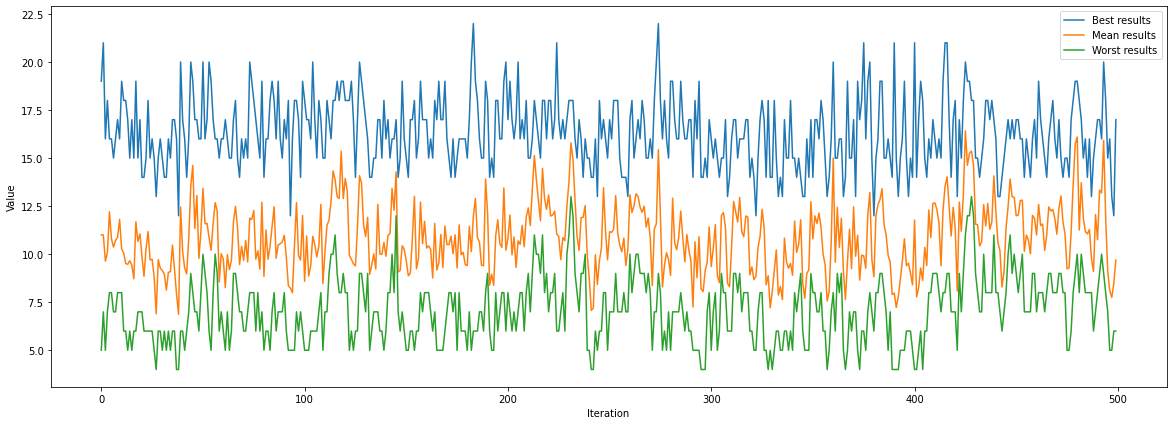

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0]
For args : 700, 10, k_deceptive_one_max, 50, 0.7, 0.3, 0.4


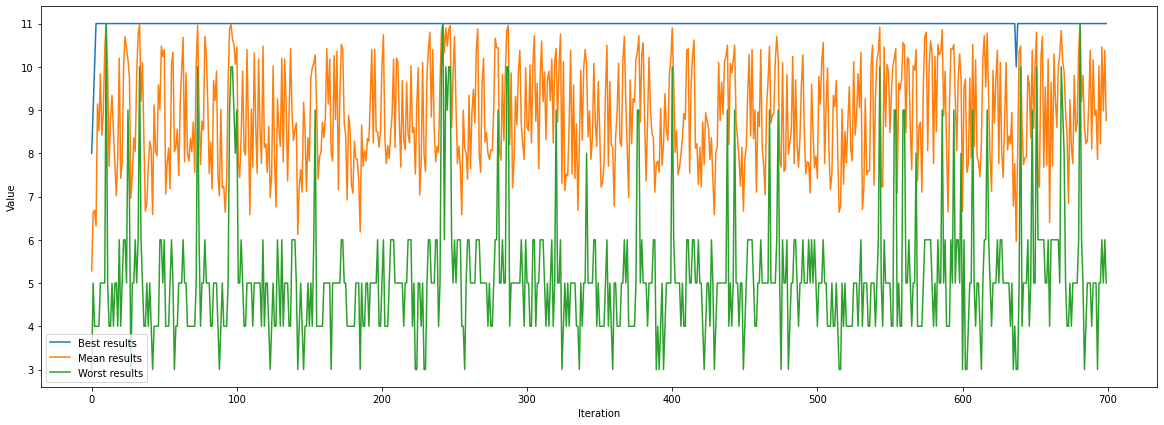

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
For args : 300, 50, k_deceptive_one_max, 20, 0.7, 0.1, 0.3


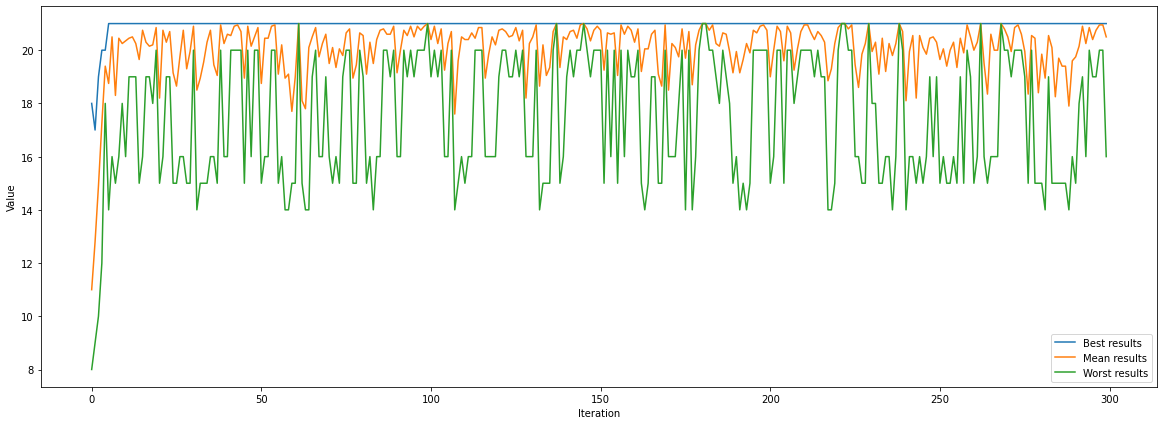

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]


In [16]:
print("K_deceptive_one_max:")
print("For args : 500, 20, k_deceptive_one_max, 200, 0.1, 0.5, 0.8")
P=PBIL(500, 20, k_deceptive_one_max, 200, 0.1, 0.5, 0.8)
plot_chart(P)
print(P[0])
print("For args : 700, 10, k_deceptive_one_max, 50, 0.7, 0.3, 0.4")
P=PBIL(700, 10, k_deceptive_one_max, 50, 0.7, 0.3, 0.4)
plot_chart(P)
print(P[0])
print("For args : 300, 50, k_deceptive_one_max, 20, 0.7, 0.1, 0.3")
P=PBIL(300, 50, k_deceptive_one_max, 20, 0.7, 0.1, 0.3)
plot_chart(P)
print(P[0])